In [2]:
"""
 [CNN]
 1.automated feature extraction
 
 



"""
!pip install cv2

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000026F52E6BEB8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/cv2/
  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2


# CNN-Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


(768, 1024, 3)


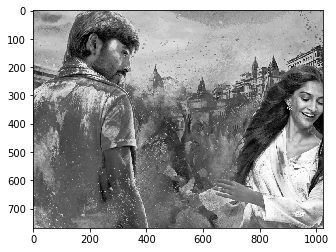

In [2]:
im=cv2.imread('./image/raa.jpg')
print(im.shape)
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.show()

In [3]:
#Sharpen
"""
vertical
K=np.array([[0,-1,0],
            [-1,5,-1],
            [0,-1,0]
])"""
"""
blur
K=np.array([[.1,.1,.1],
            [.1,.1,.1],
            [.1,.1,.1]
])


"""
"""
#horizontal
K=np.array([[-1,-2,-1],
            [0,0,0],
            [1,2,1]
])


"""
#vertical
K=np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]
])



In [5]:
r=img.shape[0]
c=img.shape[1]
k=K.shape[0]
outr=r-k+1
outc=r-k+1
new_img=np.zeros((outr,outc))

In [6]:
for r in range(outr):
    for c in range(outc):
        img_patch=img[r:r+k,c:c+k]
        prod=img_patch*K
        prod=prod.sum()
        new_img[r,c]=prod if prod>0 else 0
        

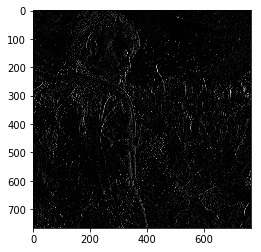

In [7]:
plt.imshow(new_img,cmap='gray')
plt.show()

# CNN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Using TensorFlow backend.


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


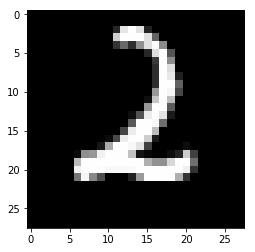

2


In [5]:
plt.imshow(x_train[122],cmap='gray')
plt.show()
print(y_train[122])

In [6]:
#X_train=x_train.reshape(60000/-1,28,28,1)
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
x_train=x_train[:3600]
y_train=y_train[:3600]
x_test=x_test[:900]
y_test=y_test[:900]

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3600, 28, 28, 1)
(3600, 10)
(900, 28, 28, 1)
(900, 10)


In [10]:
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout,Convolution2D,MaxPooling2D
from keras.models import Sequential

In [11]:
model=Sequential()
#(m,28,28,1)
model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))#(32 filters of 3*3)
model.add(Activation('relu'))
#(m,26,26,32)
model.add(Convolution2D(64,3,3)) #(64 filters of 3*3)
model.add(Activation('relu'))
# (m,24,24,64)
# model.add(Convolution2D(64,3,3)
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#(m,12,12,64)
model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))
#(m,10,10,16)
model.add(Flatten())
#(m,1600)
#regular
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
#(m,10)
model.summary()
        
          


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if sys.path[0] == '':


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),nb_epoch=12,batch_size=16,verbose=2)

C:\Users\Varun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 150s - loss: 8.8270 - acc: 0.3706 - val_loss: 1.0254 - val_acc: 0.6922
Epoch 2/12
 - 133s - loss: 0.4708 - acc: 0.8636 - val_loss: 0.2713 - val_acc: 0.9189
Epoch 3/12
 - 141s - loss: 0.2224 - acc: 0.9342 - val_loss: 0.1832 - val_acc: 0.9489
Epoch 4/12
 - 136s - loss: 0.1635 - acc: 0.9542 - val_loss: 0.1531 - val_acc: 0.9611
Epoch 5/12
 - 134s - loss: 0.1094 - acc: 0.9658 - val_loss: 0.1637 - val_acc: 0.9489
Epoch 6/12
 - 134s - loss: 0.0984 - acc: 0.9722 - val_loss: 0.1786 - val_acc: 0.9467
Epoch 7/12
 - 132s - loss: 0.0665 - acc: 0.9800 - val_loss: 0.1559 - val_acc: 0.9544
Epoch 8/12


KeyboardInterrupt: 